In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# load dataset and remove null values
df = pd.read_excel('C:\\Users\\kunal\\Downloads\\vilo.xlsx', sheetname = 'Sheet1', parse_cols = range(10), header = 2)
df.rename(columns = {'Unnamed: 8' : 'yield_ratio'}, inplace = True)
#df.isnull().sum()
df[df.isnull()].count()

df.head(20)


Date           0
FB             0
PSB            0
PVB            0
MF             0
OTHER          0
PD             0
TOTAL          0
yield_ratio    0
dtype: int64

In [3]:
# drop the date column
df.reset_index(inplace = True)
df.columns
df.drop('Date', inplace  = True, axis = 1)
df.head(10)

In [4]:
df.drop(df.columns[0], inplace = True, axis = 1)

In [5]:
#df.describe()
df.dropna(inplace = True)
df.describe()


,FB,PSB,PVB,MF,OTHER,PD,TOTAL,yield_ratio
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1.198000e+03,1198.000000
mean,-1031.049850,2003.389917,1741.919992,-287.868456,2134.394758,-4560.786327,3.917624e+05,7.864567
std,18751.010821,30173.031078,16769.199933,10416.395346,6727.396042,11943.331351,2.444663e+05,0.653576
min,-90932.070000,-262954.190000,-74110.210000,-59277.670000,-38162.100000,-57281.050000,5.530640e+04,6.187000
25%,-10037.715000,-10058.137500,-5830.362500,-5287.500000,-1395.132500,-10725.142500,2.321439e+05,7.506250
50%,-1202.500000,3287.800000,1286.460000,69.285000,2023.590000,-3315.005000,3.322311e+05,7.838000
75%,7233.015000,14667.927500,9077.727500,5038.750000,5588.437500,2083.975000,4.703947e+05,8.339750
max,148002.920000,196756.590000,111222.000000,51600.000000,40787.550000,53193.000000,1.991021e+06,9.240000


In [6]:
type(df['FB'])

pandas.core.series.Series

In [7]:
# calculation of moving point average
a = pd.rolling_mean(df['yield_ratio'], 2)

C:\Users\kunal\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=2,center=False).mean()
  from ipykernel import kernelapp as app


In [8]:
type(a)

pandas.core.series.Series

In [9]:
df.drop([0,1], inplace = True)


In [10]:
df['moving_average'] = a
df.head()
df_train = df.copy()


In [11]:
df_train.drop(['moving_average', 'yield_ratio'], axis = 1, inplace = True)

In [12]:
input_data = df_train.as_matrix()
type(input_data)
print(len(input_data))
target = np.asarray(df['moving_average'])
print(len(target))
type(target)


1196
1196


numpy.ndarray

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
X = input_data
Y = target
clf = RandomForestRegressor(n_estimators = 100)
clf = clf.fit(X,Y)

In [15]:
predicted_values = clf.predict(X)

In [16]:
len(predicted_values)

1196

In [17]:
Pred = pd.Series(predicted_values)

In [18]:
df['Predicted_values'] = Pred

In [19]:
df.head(20)

,FB,PSB,PVB,MF,OTHER,PD,TOTAL,yield_ratio,moving_average,Predicted_values
2,-3342.33,-4013.30,403.48,100.14,6266.56,585.45,103720.20,8.514,8.5130,8.525355
3,-13724.92,-2453.00,17583.50,2835.48,5715.03,-9956.09,134772.50,8.526,8.5200,8.445800
4,-6322.56,348.05,5393.99,-2200.00,8460.29,-5679.77,87283.50,8.539,8.5325,8.477490
5,1335.00,-1485.00,-369.70,2250.00,2945.00,-4675.30,108497.40,8.537,8.5380,8.453275
6,5503.01,-5252.77,-3450.07,-600.00,7070.39,-3270.55,124396.20,8.519,8.5280,8.482775
7,6650.00,-3025.50,-6826.70,1550.00,4302.20,-2650.00,131941.80,8.497,8.5080,8.489985
8,4116.68,305.00,-4409.06,-816.68,4434.00,-3629.94,110307.10,8.523,8.5100,8.487852
9,2790.00,-7025.46,-2595.78,-1550.00,6547.84,1833.40,111888.00,8.512,8.5175,8.360850
10,2889.63,4023.40,1640.10,-2666.00,1627.97,-7515.09,100854.90,8.519,8.5155,8.366265
11,-14033.95,-3304.60,10392.60,5100.00,5991.96,-4146.01,186316.91,8.525,8.5220,8.187690


In [20]:
cost_error = (df['moving_average'] - df['Predicted_values'])


In [21]:
cost_error.dropna(inplace = True)



In [25]:
total_cost = np.array(cost_error)
type(np.array(cost_error))

numpy.ndarray

In [28]:
squared_error = np.sum(np.square(total_cost))/len(total_cost)
print(squared_error)

0.053403618434


In [29]:
import matplotlib.pyplot as plt
% matplotlib inline

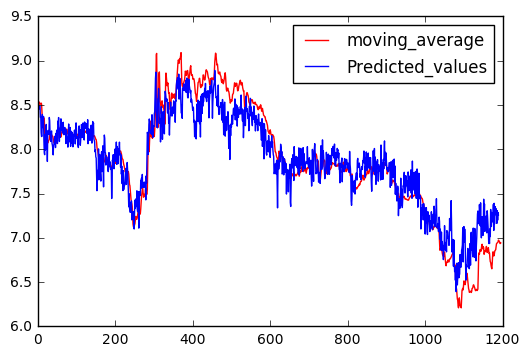

In [33]:
plt.plot(range(len(df)), df['moving_average'], 'r')
plt.plot(range(len(df)), df['Predicted_values'], 'b')
plt.legend()

In [48]:
imp = clf.feature_importances_
type(imp)
imp.shape

(7,)

In [64]:
a = list(df.columns)[:-3]


In [55]:
imp_data = pd.DataFrame({'input_factors' : a, 'relative_imp' : imp})

In [56]:
imp_data

,input_factors,relative_imp
0,FB,0.115092
1,PSB,0.103202
2,PVB,0.085735
3,MF,0.126407
4,OTHER,0.100389
5,PD,0.092581
6,TOTAL,0.376593


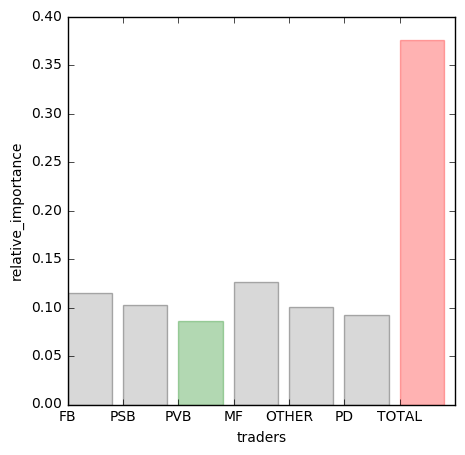

In [74]:
plt.figure(figsize = (5,5))
graph = plt.bar(np.arange(len(imp_data)), imp_data['relative_imp'], color = 'grey', alpha = 0.3)
plt.xticks(np.arange(len(imp_data)), a)
i = np.argmin(imp)
graph[i].set_color('green')
j = np.argmax(imp)
graph[j].set_color('red')
plt.xlabel('traders')
plt.ylabel('relative_importance')

In [77]:
df.to_excel('C:\\Users\\kunal\\Downloads\\pred.xlsx')